In [ ]:
## 1.INTRODUCTION

#SEQN = Respondent sequence number (
#SMQ020 = Smoking
#RIAGENDR = Gender
#RIDAGEYR = Age (years)
#DMDEDUC2 = Education level
#BMXWT = Weight (kg)
#BMXHT = Height (cm)
#BMXBMI = BMI

In [ ]:
## 2.RETRIVING THE DATA

In [7]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

da = pd.read_csv('NHANES.csv')
da.head()

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,...,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,...,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,...,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,...,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,...,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0


In [8]:
#to find the size of the dataset
da.shape

(5735, 28)

In [9]:
#we are isolating the required data from the existing huge data
#we are taking required 8 columns from the 28 columns
data = da.loc[:,('SEQN','SMQ020', 'RIAGENDR', 'RIDAGEYR','DMDEDUC2','BMXWT', 'BMXHT', 'BMXBMI')]
data.head()

,SEQN,SMQ020,RIAGENDR,RIDAGEYR,DMDEDUC2,BMXWT,BMXHT,BMXBMI
0,83732,1,1,62,5.0,94.8,184.5,27.8
1,83733,1,1,53,3.0,90.4,171.4,30.8
2,83734,1,1,78,3.0,83.4,170.1,28.8
3,83735,2,2,56,5.0,109.8,160.9,42.4
4,83736,2,2,42,4.0,55.2,164.9,20.3


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5735 entries, 0 to 5734
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SEQN      5735 non-null   int64  
 1   SMQ020    5735 non-null   int64  
 2   RIAGENDR  5735 non-null   int64  
 3   RIDAGEYR  5735 non-null   int64  
 4   DMDEDUC2  5474 non-null   float64
 5   BMXWT     5666 non-null   float64
 6   BMXHT     5673 non-null   float64
 7   BMXBMI    5662 non-null   float64
dtypes: float64(4), int64(4)
memory usage: 358.6 KB


In [11]:
# Change the column names to ease the use
data.columns = ['seqn','smoking','gender', 'age','education','weight','height','bmi']


In [12]:
#to checck the changed values
data.head()

,seqn,smoking,gender,age,education,weight,height,bmi
0,83732,1,1,62,5.0,94.8,184.5,27.8
1,83733,1,1,53,3.0,90.4,171.4,30.8
2,83734,1,1,78,3.0,83.4,170.1,28.8
3,83735,2,2,56,5.0,109.8,160.9,42.4
4,83736,2,2,42,4.0,55.2,164.9,20.3


In [13]:
## 3.DATA CLEANING

In [14]:
#checking for the duplicates
duplicateRowsDF = data[data.duplicated()]
duplicateRowsDF

,seqn,smoking,gender,age,education,weight,height,bmi


In [15]:
#no duplicate data found

In [16]:
#checking for the missing data
data.isnull().sum()

seqn           0
smoking        0
gender         0
age            0
education    261
weight        69
height        62
bmi           73
dtype: int64

In [17]:
#we found we have some missing values so we are dropping the rows
data.shape

(5735, 8)

In [18]:
#droping the missing values
data.dropna(inplace = True)

In [19]:
#data set after removing the missing values
data.shape

(5406, 8)

In [20]:
#getting the basic stasts of data
numerical = ['age','weight','height','bmi']
data[numerical].describe()

,age,weight,height,bmi
count,5406.000000,5406.000000,5406.000000,5406.000000
mean,49.390122,81.715594,166.055679,29.541861
std,17.640915,21.775173,10.107149,7.076574
min,20.000000,32.400000,129.700000,14.500000
25%,34.000000,66.300000,158.600000,24.500000
50%,49.000000,78.500000,165.900000,28.500000
75%,64.000000,93.200000,173.400000,33.200000
max,80.000000,198.900000,202.700000,67.300000


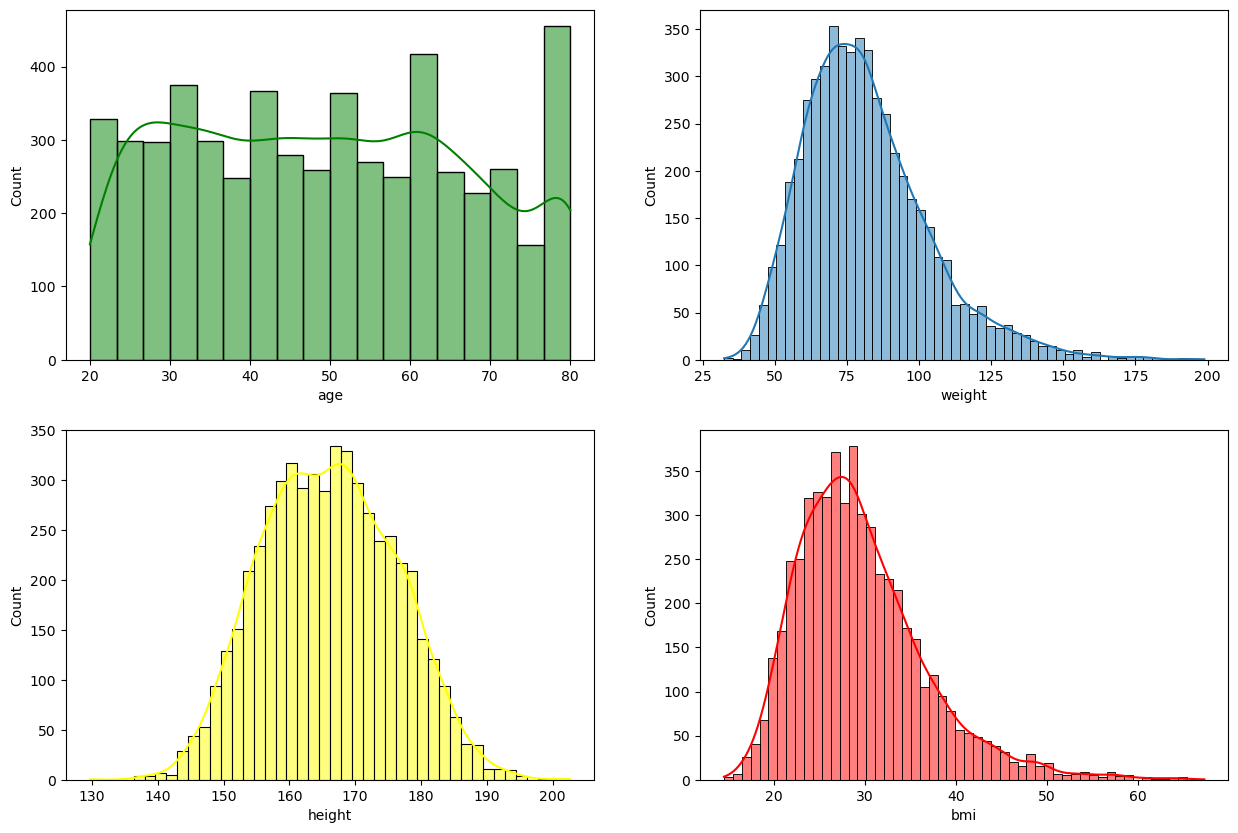

In [21]:
#creating histograms for numericals

fig , axs = plt.subplots(2,2, figsize=(15,10) )
sns.histplot(data = data, x="age", kde=True ,color='green', ax=axs[0,0])
sns.histplot(data =data,x="weight",kde=True,ax=axs[0,1])
sns.histplot(data = data, x="height", kde=True ,color='yellow', ax=axs[1,0])
sns.histplot(data = data, x="bmi", kde=True ,color='red' ,ax=axs[1,1])

plt.show()

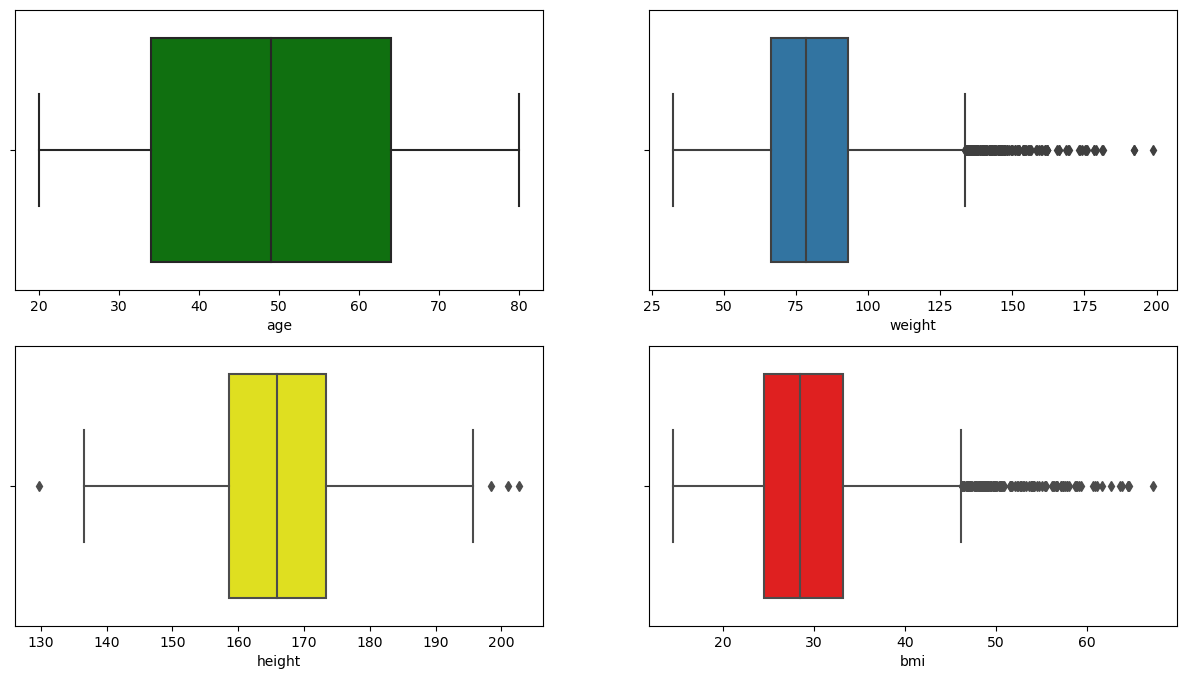

In [22]:
#create boxplots to observe distribution

fig, axs = plt.subplots(2,2, figsize=(15,8))

sns.boxplot(data=data, x="age",color='green', ax = axs[0,0])
sns.boxplot(data=data, x="weight", ax = axs[0,1])
sns.boxplot(data=data, x="height",color='yellow', ax = axs[1,0])
sns.boxplot(data=data, x="bmi",color='red', ax = axs[1,1])
plt.show()

In [23]:
#from the box plots we can find that we have outliners in weight,height and bmi but not in age
#so we are removing the outliners from each

In [24]:
#height

qh25, qh50, qh75 = np.percentile(data['height'], [25,50,75],axis=0)
iqrh = qh75-qh25
minh = qh25 - 1.5*iqrh
maxh = qh75 + 1.5*iqrh

#Choose the data inside IQR
data = data[(data['height'] > minh) & (data['height'])]

In [25]:
# Weight
qw25, qw50, qw75 = np.percentile(data['weight'], [25,50,75])
iqrw = qw75-qw25
maxw = qh75 + 1.5*iqrw

#Choose the data inside IQR (only data below the max value of weight since the data is right-skewed)
data = data[data['weight'] < maxw]

In [26]:
# BMI
qb25, qb50, qb75 = np.percentile(data['bmi'], [25,50,75])
iqrb = qb75-qb25
maxb = qb75 + 1.5*iqrb

#Choose the data inside IQR (only data below the max value of bmi since the data is right-skewed)
data = data[data['bmi'] < maxb]

In [27]:
# Look at the data after removing outliers
data.shape

(5255, 8)

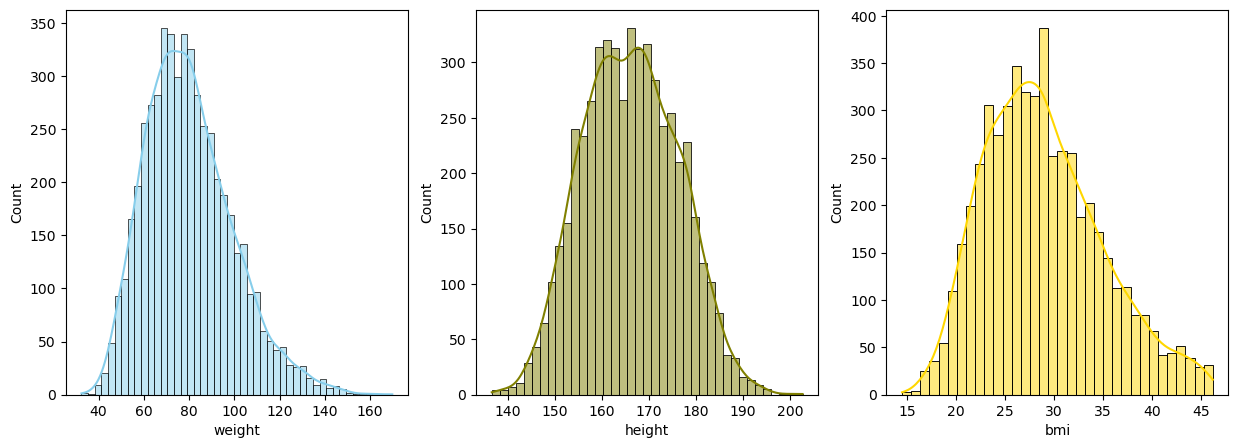

In [31]:
# Check the distribution after removing outlier

fig, axs = plt.subplots(1,3, figsize=(15, 5))
      
sns.histplot(data= data, x="weight", kde=True, color="skyblue", ax=axs[0])
sns.histplot(data= data, x="height", kde=True, color="olive", ax=axs[1])
sns.histplot(data= data, x="bmi", kde=True, color="gold", ax=axs[2])

plt.show()

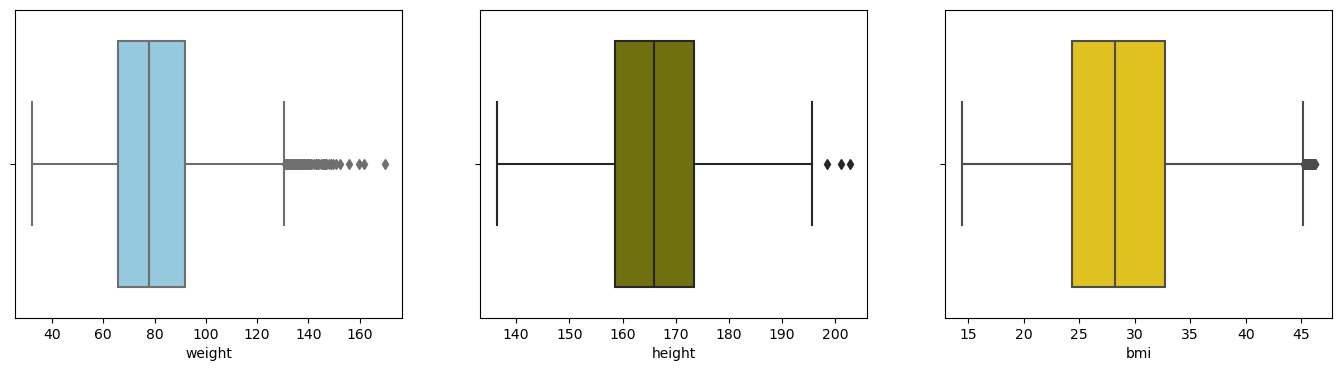

In [34]:
# Check distribution using boxplot after removing outliers

fig, axs = plt.subplots(1,3, figsize=(17, 4))

sns.boxplot(data= data, x="weight",color="skyblue", ax = axs[0])
sns.boxplot(data=data, x="height",color="olive", ax = axs[1])
sns.boxplot(data=data ,x="bmi",color="gold", ax = axs[2])

plt.show()